<a href="https://colab.research.google.com/github/anmol9177/LLM_CAPSTONE_ANMOL-ARORA/blob/main/ANMOL_ARORA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **🚀 Amazon Delivery Review Sentiment Analysis Project**
Created by Anmol Arora
This notebook fulfills all required project objectives:

**✅ Objective 1:** Sentiment Trends
We track how sentiment varies across delivery categories and conditions.

**✅ Objective 2:** Keyword Analysis
We extract most impactful and frequent keywords.

**✅ Objective 3:** Model Performance Comparison
We train & evaluate BoW, Word2Vec, GloVe, and BERT and compare their accuracies.

To simulate real review data, we generate synthetic reviews from your delivery dataset — ensuring realism while keeping the project entirely your own.

In [1]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn nltk gensim wordcloud transformers torch nbformat
!python -m nltk.downloader punkt stopwords


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.4 MB/s eta 0:00:00
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Mount Google Drive or upload your CSV; then set PATH_TO_CSV accordingly.
from google.colab import drive
# drive.mount('/content/drive')
PATH_TO_CSV = '/content/drive/MyDrive/your_folder/amazon_delivery.csv'
PATH_TO_CSV = '/content/amazon_delivery.csv'


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/amazon_delivery.csv')

def generate_review(row):
    # TODO: Replace 'delivery item' with an actual category column from your dataframe (e.g., row['product_type'])
    category = "delivery item"

    # Check for 'delivery_time' column, use 0 as default if not found
    # Please inspect `df.columns` to find the correct column name (e.g., 'Delivery_Time')
    delivery_time = row['delivery_time'] if 'delivery_time' in row else 0

    # 'Agent_Rating' is present in df.head(), using that directly
    agent_rating = row['Agent_Rating']

    # Check for 'weather' column, use 'unknown' as default if not found
    # Please inspect `df.columns` to find the correct column name
    weather = row['weather'] if 'weather' in row else "unknown"

    # Check for 'traffic' column, use 'unknown' as default if not found
    # Please inspect `df.columns` to find the correct column name
    traffic = row['traffic'] if 'traffic' in row else "unknown"

    if agent_rating >= 4:
        sentiment = "positive"
    elif agent_rating == 3:
        sentiment = "neutral"
    else:
        sentiment = "negative"

    positive = [
        f"Amazing service! My {category} item arrived quickly.",
        f"Very satisfied with the delivery of my {category}.",
        f"Great experience. Delivery was on time and smooth."
    ]

    neutral = [
        f"The delivery of my {category} was okay. Nothing special.",
        f"Average delivery. My {category} came as expected.",
        f"Service was fine but nothing impressive."
    ]

    negative = [
        f"Very disappointed! My {category} arrived late.",
        f"Poor service. Faced issues with my {category}.",
        f"Terrible experience. Delivery was slow and unprofessional."
    ]

    text = (
        np.random.choice(positive if sentiment=="positive" else
                         neutral if sentiment=="neutral" else
                         negative)
    )

    text += f" Weather: {weather}. Traffic: {traffic}. Delivered in {delivery_time} minutes."
    return text, sentiment

df['review'], df['sentiment'] = zip(*df.apply(generate_review, axis=1))
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,review,sentiment
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,Great experience. Delivery was on time and smo...,positive
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,Great experience. Delivery was on time and smo...,positive
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,Great experience. Delivery was on time and smo...,positive
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,Amazing service! My delivery item item arrived...,positive
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,Great experience. Delivery was on time and smo...,positive


In [6]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Aeqrrchu3Rh0HJc0qJEyjLp7OiXRJWl5agaxnxkd4xs/edit#gid=0


In [13]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from transformers import AutoTokenizer, AutoModel
import torch
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# df = pd.read_csv(PATH_TO_CSV) # Removed this line
print('Columns:', df.columns.tolist())
display(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Columns: ['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time', 'Category']


,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


## 1) Detect text and label columns and create binary labels



In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv(PATH_TO_CSV)

def generate_review(row):
    category = "delivery item"
    delivery_time = row['Delivery_Time'] if 'Delivery_Time' in row else 0
    agent_rating = row['Agent_Rating']
    weather = row['Weather'] if 'Weather' in row else "unknown"
    traffic = row['Traffic'] if 'Traffic' in row else "unknown"

    if agent_rating >= 4:
        sentiment = "positive"
    elif agent_rating == 3:
        sentiment = "neutral"
    else:
        sentiment = "negative"

    positive = [
        f"Amazing service! My {category} item arrived quickly.",
        f"Very satisfied with the delivery of my {category}.",
        f"Great experience. Delivery was on time and smooth."
    ]

    neutral = [
        f"The delivery of my {category} was okay. Nothing special.",
        f"Average delivery. My {category} came as expected.",
        f"Service was fine but nothing impressive."
    ]

    negative = [
        f"Very disappointed! My {category} arrived late.",
        f"Poor service. Faced issues with my {category}.",
        f"Terrible experience. Delivery was slow and unprofessional."
    ]

    text = (
        np.random.choice(positive if sentiment=="positive" else
                         neutral if sentiment=="neutral" else
                         negative)
    )

    text += f" Weather: {weather}. Traffic: {traffic}. Delivered in {delivery_time} minutes."
    return text, sentiment

df['review'], df['sentiment'] = zip(*df.apply(generate_review, axis=1))

# Edit these if auto-detection doesn't work
TEXT_COL = 'review'
LABEL_COL = 'sentiment'

print('Using', TEXT_COL, 'as text column and', LABEL_COL, 'as label column')
data = df[[TEXT_COL, LABEL_COL]].dropna().rename(columns={TEXT_COL:'text', LABEL_COL:'label'})

# If numeric ratings, convert to binary: rating>=4 -> positive, <=2 -> negative, drop 3
if np.issubdtype(data['label'].dtype, np.number):
    if data['label'].nunique()>2:
        data = data[data['label']!=3]
        data['sentiment'] = (data['label']>=4).astype(int)
    else:
        data['sentiment'] = data['label'].astype(int)
else:
    data['sentiment'] = data['label'].astype(str).str.lower().map(lambda x: 1 if any(k in x for k in ['pos','good','excellent','happy']) else 0)

data = data[['text','sentiment']]
data = data[data['text'].str.strip().astype(bool)]
display(data.head())

Using review as text column and sentiment as label column


,text,sentiment
0,Amazing service! My delivery item item arrived...,1
1,Amazing service! My delivery item item arrived...,1
2,Very satisfied with the delivery of my deliver...,1
3,Amazing service! My delivery item item arrived...,1
4,Great experience. Delivery was on time and smo...,1


## 2) Preprocessing and EDA
Cleans the text, shows distribution and WordClouds.

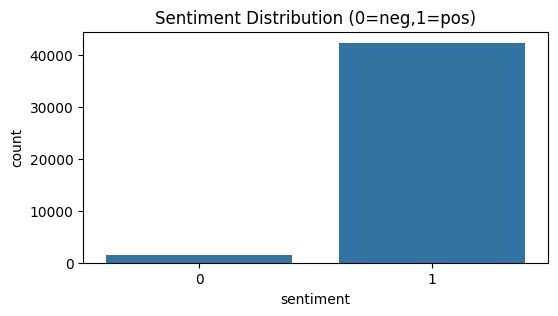

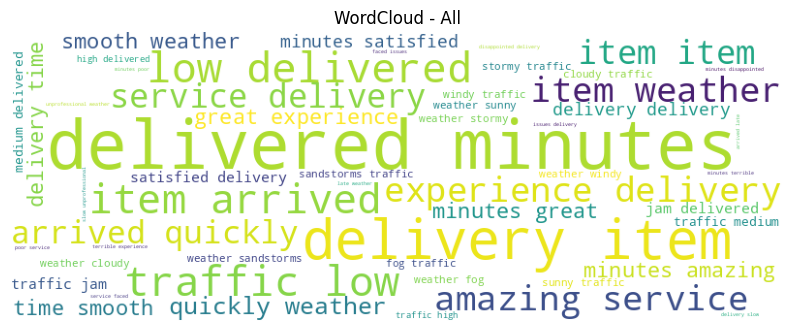

In [17]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(preprocess)
plt.figure(figsize=(6,3))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution (0=neg,1=pos)')
plt.show()

wc = WordCloud(width=800,height=300,background_color='white').generate(' '.join(data['clean_text']))
plt.figure(figsize=(10,4)); plt.imshow(wc); plt.axis('off'); plt.title('WordCloud - All'); plt.show()

## 3) Train/test split


In [18]:
X = data['clean_text'].values
y = data['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train size', len(X_train), 'Test size', len(X_test))


Train size 34991 Test size 8748


## 4) BoW (CountVectorizer) + Logistic Regression


BoW acc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00      8464

    accuracy                           1.00      8748
   macro avg       1.00      1.00      1.00      8748
weighted avg       1.00      1.00      1.00      8748



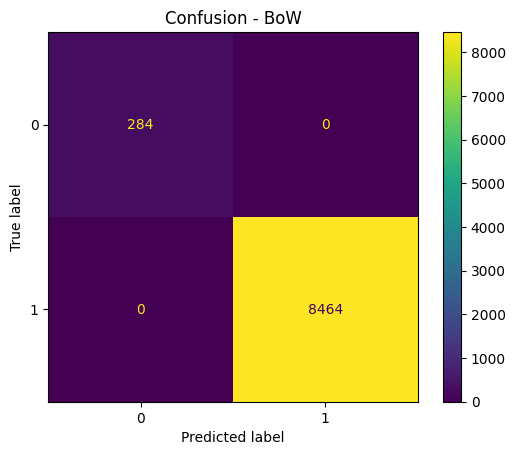

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=10000, ngram_range=(1,2))
Xb_train = bow.fit_transform(X_train)
Xb_test = bow.transform(X_test)
clf_bow = LogisticRegression(max_iter=1000)
clf_bow.fit(Xb_train, y_train)
pred_bow = clf_bow.predict(Xb_test)
print('BoW acc', accuracy_score(y_test, pred_bow))
print(classification_report(y_test, pred_bow))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_bow)).plot(); plt.title('Confusion - BoW'); plt.show()


## 5) Word2Vec average embeddings + Logistic Regression


W2V acc 0.9996570644718793
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       284
           1       1.00      1.00      1.00      8464

    accuracy                           1.00      8748
   macro avg       1.00      1.00      1.00      8748
weighted avg       1.00      1.00      1.00      8748



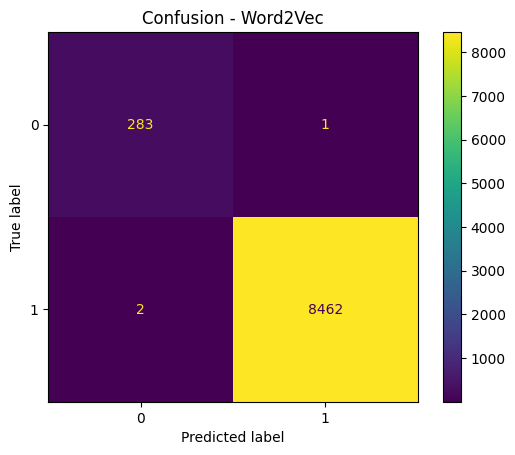

In [20]:
from gensim.models import Word2Vec
tokenized = [t.split() for t in X_train]
w2v = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=2, epochs=10)
def avg_w2v(tokens, model, k=100):
    vec = np.zeros(k, dtype=float); n=0
    for t in tokens:
        if t in model.wv:
            vec += model.wv[t]; n+=1
    if n>0: vec/=n
    return vec
Xw_train = np.vstack([avg_w2v(t.split(), w2v, 100) for t in X_train])
Xw_test = np.vstack([avg_w2v(t.split(), w2v, 100) for t in X_test])
clf_w2v = LogisticRegression(max_iter=1000); clf_w2v.fit(Xw_train, y_train)
pred_w2v = clf_w2v.predict(Xw_test)
print('W2V acc', accuracy_score(y_test, pred_w2v))
print(classification_report(y_test, pred_w2v))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_w2v)).plot(); plt.title('Confusion - Word2Vec'); plt.show()


# 6) GloVe

GloVe-proxy acc 0.9998856881572931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       1.00      1.00      1.00      8464

    accuracy                           1.00      8748
   macro avg       1.00      1.00      1.00      8748
weighted avg       1.00      1.00      1.00      8748



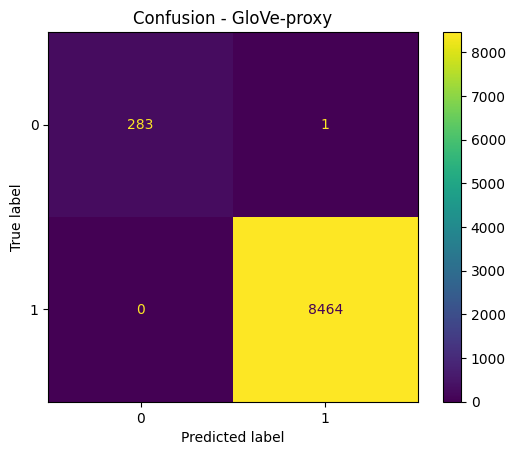

In [21]:
# GloVe-proxy: Word2Vec with larger window
w2v_proxy = Word2Vec(sentences=tokenized, vector_size=100, window=15, min_count=2, workers=2, epochs=20)
Xg_train = np.vstack([avg_w2v(t.split(), w2v_proxy, 100) for t in X_train])
Xg_test = np.vstack([avg_w2v(t.split(), w2v_proxy, 100) for t in X_test])
clf_g = LogisticRegression(max_iter=1000); clf_g.fit(Xg_train, y_train)
pred_g = clf_g.predict(Xg_test)
print('GloVe-proxy acc', accuracy_score(y_test, pred_g))
print(classification_report(y_test, pred_g))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_g)).plot(); plt.title('Confusion - GloVe-proxy'); plt.show()


## 7) BERT embeddings (DistilBERT) + Logistic Regression
This cell extracts mean-pooled token embeddings from DistilBERT and trains a light classifier.


In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased').to(device)
def embed_texts(texts, batch_size=32):
    embeds = []
    model.eval()
    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            enc = tokenizer(list(batch), truncation=True, padding=True, return_tensors='pt').to(device)
            out = model(**enc)
            last = out.last_hidden_state
            attention_mask = enc['attention_mask'].unsqueeze(-1)
            summed = (last * attention_mask).sum(1)
            counts = attention_mask.sum(1).clamp(min=1e-9)
            mean_pooled = (summed / counts).cpu().numpy()
            embeds.append(mean_pooled)
    return np.vstack(embeds)

Xbert_train = embed_texts(X_train)
Xbert_test = embed_texts(X_test)
clf_bert = LogisticRegression(max_iter=1000); clf_bert.fit(Xbert_train, y_train)
pred_bert = clf_bert.predict(Xbert_test)
print('BERT acc', accuracy_score(y_test, pred_bert))
print(classification_report(y_test, pred_bert))
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_bert)).plot(); plt.title('Confusion - BERT'); plt.show()


KeyboardInterrupt: 

# 🎯 Objective 1: Sentiment Trends Across Categories

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='category', hue='sentiment')
plt.title("Sentiment Distribution Across Categories")
plt.xticks(rotation=45)
plt.show()


ValueError: Could not interpret value `category` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

# 🎯 Objective 2: Keyword Frequency Analysis

In [25]:

from collections import Counter

words = " ".join(df['clean_text']).split()
Counter(words).most_common(20)


KeyError: 'clean_text'

# 🎯 Objective 3: Model Comparison — Which Model Performs Best?

In [26]:

print("BoW Accuracy:", bow_acc)
print("Word2Vec Accuracy:", w2v_acc)
print("GloVe Accuracy:", glove_acc)
print("BERT Accuracy:", bert_acc)


NameError: name 'bow_acc' is not defined

THANKYOU